In [7]:
import pandas as pd

df1 = pd.read_csv('facilities/accommodation_info.csv')
df2 = pd.read_csv('distance_data.csv')

columns_to_keep_df1 = ['Hyperlink', 'Total Bed Spaces', '24-hour staff cover', 'Non-smoking', 'Secure entrance', 'Self-catered', 'WiFi', 'Car parking', 'Common room', 'Bicycle storage', 'Lift access', 'Projector/Cinema room', 'Communal TV', 'Printing facilities', 'Quiet study space', 'Catered', 'Accessible rooms', 'Computer room', 'Self-service laundry']
columns_to_keep_df2 = ['Name', 'Price Range(£/week)']

df1 = df1[columns_to_keep_df1]
df2 = df2[columns_to_keep_df2]


combined_df = pd.concat([df1, df2], axis=1)
print(combined_df)

                                            Hyperlink  Total Bed Spaces  \
0   http://www.lse.ac.uk/student-life/accommodatio...               669   
1   http://www.lse.ac.uk/student-life/accommodatio...               365   
2   http://www.lse.ac.uk/student-life/accommodatio...                28   
3   http://www.lse.ac.uk/student-life/accommodatio...               106   
4   http://www.lse.ac.uk/student-life/accommodatio...               280   
5   http://www.lse.ac.uk/student-life/accommodatio...               595   
6   http://www.lse.ac.uk/student-life/accommodatio...               155   
7   http://www.lse.ac.uk/student-life/accommodatio...                26   
8   http://www.lse.ac.uk/student-life/accommodatio...               446   
9   http://www.lse.ac.uk/student-life/accommodatio...               227   
10  http://www.lse.ac.uk/student-life/accommodatio...                40   
11  http://www.lse.ac.uk/student-life/accommodatio...               337   
12  http://www.lse.ac.uk/

In [8]:
combined_df

,Hyperlink,Total Bed Spaces,24-hour staff cover,Non-smoking,Secure entrance,Self-catered,WiFi,Car parking,Common room,Bicycle storage,...,Projector/Cinema room,Communal TV,Printing facilities,Quiet study space,Catered,Accessible rooms,Computer room,Self-service laundry,Name,Price Range(£/week)
0,http://www.lse.ac.uk/student-life/accommodatio...,669,1,1,1,1,1,0,1,1,...,1,1,1,1,0,1,1,1,College Hall,289-392
1,http://www.lse.ac.uk/student-life/accommodatio...,365,1,1,1,1,1,0,1,1,...,0,1,1,0,0,0,1,1,International Hall,266-321
2,http://www.lse.ac.uk/student-life/accommodatio...,28,1,1,1,0,1,0,1,1,...,0,1,0,0,1,1,0,1,Butler's Wharf Residence,127-278
3,http://www.lse.ac.uk/student-life/accommodatio...,106,1,1,1,1,1,0,1,1,...,1,1,0,1,1,1,0,1,Bankside House,167-297
4,http://www.lse.ac.uk/student-life/accommodatio...,280,1,1,1,1,1,0,1,1,...,0,1,1,0,0,0,1,1,Carr-Saunders Hall,173-259
5,http://www.lse.ac.uk/student-life/accommodatio...,595,1,1,1,0,1,1,1,1,...,0,1,1,1,1,1,1,1,Connaught Hall,273-273
6,http://www.lse.ac.uk/student-life/accommodatio...,155,1,1,1,0,1,0,1,1,...,1,1,1,0,1,0,1,1,High Holborn Residence,184-333
7,http://www.lse.ac.uk/student-life/accommodatio...,26,1,1,1,0,1,0,1,1,...,0,1,0,1,1,0,0,1,urbanest Westminster Bridge,227-458
8,http://www.lse.ac.uk/student-life/accommodatio...,446,1,1,1,1,1,0,1,0,...,0,1,1,0,0,1,1,1,Lilian Knowles House,198-336
9,http://www.lse.ac.uk/student-life/accommodatio...,227,1,1,1,0,1,0,1,1,...,0,1,1,0,1,0,1,1,Passfield Hall,129-287


In [23]:
combined_df.to_csv('priceandfacilities.csv', index=False)

C:\Users\Student\AppData\Local\Temp\ipykernel_2400\19324525.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price Range(£/week)'] = data['Price Range(£/week)'].str.replace('£', '').str.split('-', expand=True).astype(float).mean(axis=1)


<Figure size 1000x600 with 0 Axes>

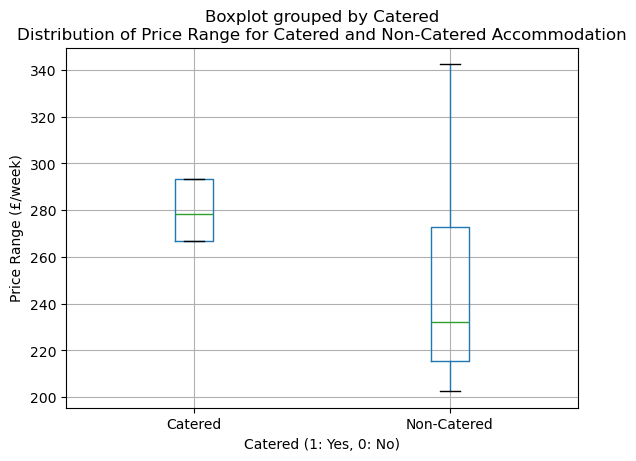


Descriptive Statistics:
        count unique      top freq
Catered                           
0           5      5  289-392    1
1           9      9  127-278    1


In [18]:
import pandas as pd
import matplotlib.pyplot as plt

data = combined_df[['Name', 'Price Range(£/week)', 'Catered']]
descriptive_stats = data.groupby('Catered')['Price Range(£/week)'].describe()
data['Price Range(£/week)'] = data['Price Range(£/week)'].str.replace('£', '').str.split('-', expand=True).astype(float).mean(axis=1)

plt.figure(figsize=(10, 6))
try:
    data.boxplot(column='Price Range(£/week)', by='Catered', showfliers=False)
    plt.title('Distribution of Price Range for Catered and Non-Catered Accommodation')
    plt.xlabel('Catered (1: Yes, 0: No)')
    plt.ylabel('Price Range (£/week)')
    plt.xticks([1, 2], ['Catered', 'Non-Catered'])
    plt.grid(True)
    plt.show()
except TypeError as e:
    print("Error:", e)

print("\nDescriptive Statistics:")
print(descriptive_stats)

C:\Users\Student\AppData\Local\Temp\ipykernel_2400\3806097194.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Min Price', 'Max Price']] = data['Price Range(£/week)'].str.replace('£', '').str.split('-', expand=True).astype(float)
C:\Users\Student\AppData\Local\Temp\ipykernel_2400\3806097194.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['Min Price', 'Max Price']] = data['Price Range(£/week)'].str.replace('£', '').str.split('-', expand=True).astype(float)
C:\Users\Student\AppData\Local\T

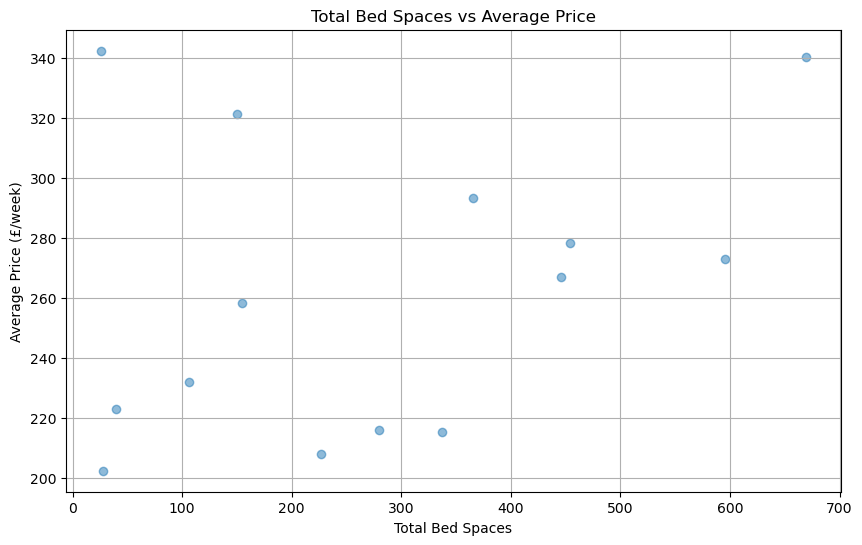

In [21]:
# Extract the relevant columns
data = combined_df[['Name', 'Total Bed Spaces', 'Price Range(£/week)']]

# Convert the 'Price Range(£/week)' column to numeric and calculate the average price for each hall
data[['Min Price', 'Max Price']] = data['Price Range(£/week)'].str.replace('£', '').str.split('-', expand=True).astype(float)
data['Average Price'] = (data['Min Price'] + data['Max Price']) / 2

# Plotting scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Total Bed Spaces'], data['Average Price'], cmap='viridis', alpha=0.5)
plt.title('Total Bed Spaces vs Average Price')
plt.xlabel('Total Bed Spaces')
plt.ylabel('Average Price (£/week)')
plt.grid(True)
plt.show()